Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

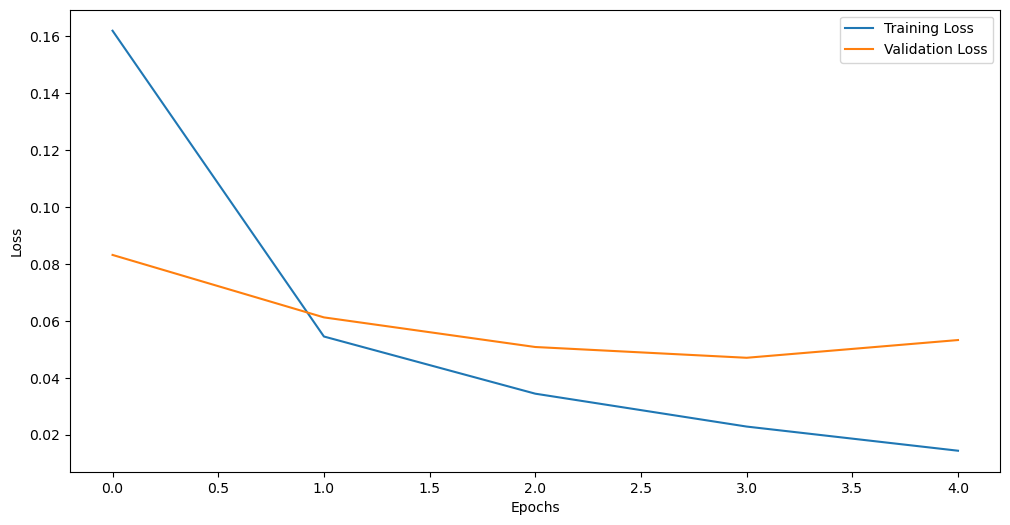

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Further split the training dataset into training and validation
split_ratio = 0.8
split_index = int(len(train_images) * split_ratio)
validation_images, validation_labels = train_images[split_index:], train_labels[split_index:]
train_images, train_labels = train_images[:split_index], train_labels[:split_index]

# Preprocess the data
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(validation_images[..., np.newaxis], validation_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels)

# Print the accuracy and loss
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Generate predictions
predictions = model.predict(test_images[..., np.newaxis])
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the loss vs. iterations
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

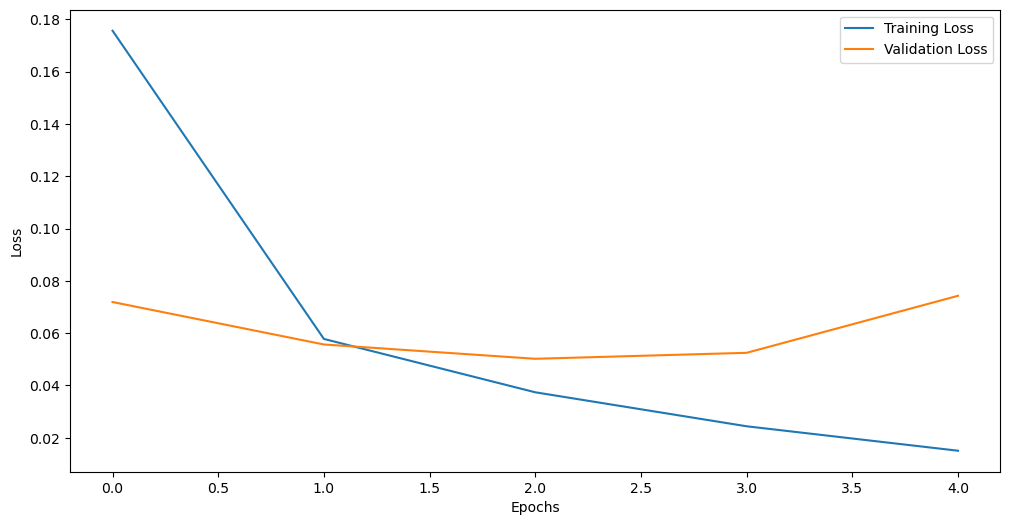

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Further split the training dataset into training and validation
split_ratio = 0.8
split_index = int(len(train_images) * split_ratio)
validation_images, validation_labels = train_images[split_index:], train_labels[split_index:]
train_images, train_labels = train_images[:split_index], train_labels[:split_index]

# Preprocess the data
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Print the CNN architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(validation_images[..., np.newaxis], validation_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels)

# Print the accuracy and loss for test set
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Generate predictions for test set
predictions_test = model.predict(test_images[..., np.newaxis])
predicted_labels_test = np.argmax(predictions_test, axis=1)

# Generate predictions for training set
predictions_train = model.predict(train_images[..., np.newaxis])
predicted_labels_train = np.argmax(predictions_train, axis=1)

# Generate predictions for validation set
predictions_validation = model.predict(validation_images[..., np.newaxis])
predicted_labels_validation = np.argmax(predictions_validation, axis=1)

# Create confusion matrices
conf_matrix_test = confusion_matrix(test_labels, predicted_labels_test)
conf_matrix_train = confusion_matrix(train_labels, predicted_labels_train)
conf_matrix_validation = confusion_matrix(validation_labels, predicted_labels_validation)

# Print the confusion matrices
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

print("\nConfusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Validation Set):")
print(conf_matrix_validation)

# Plot the loss vs. iterations
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()